In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

In [9]:
# Set plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
# Assumes the dataset is in the working directory
df = pd.read_csv('Employee.csv')
print(df.shape)  # Output: (1470, 35)
print(df.columns)

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [10]:
# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHour

In [11]:
# Check the shape of the dataset (rows, columns)
print("\nDataset shape:", df.shape)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset shape: (1470, 35)

Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtComp

In [12]:
# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Data types of each column:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel           

In [13]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


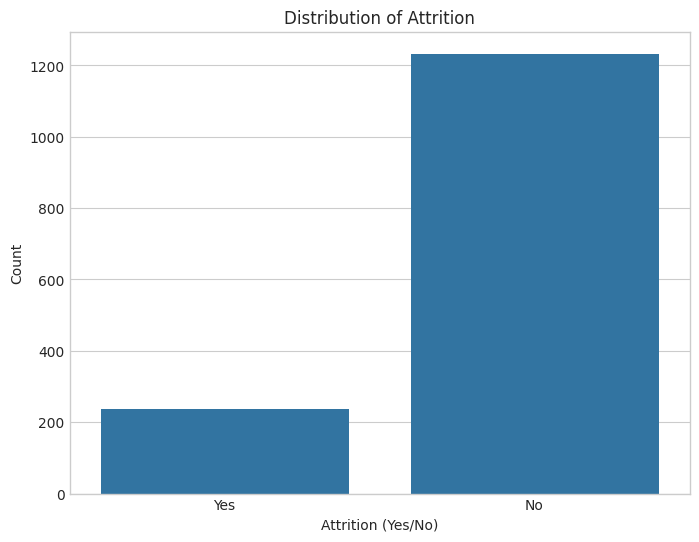

In [14]:
# Visualize the distribution of the target variable (Attrition)
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('Count')
plt.show()

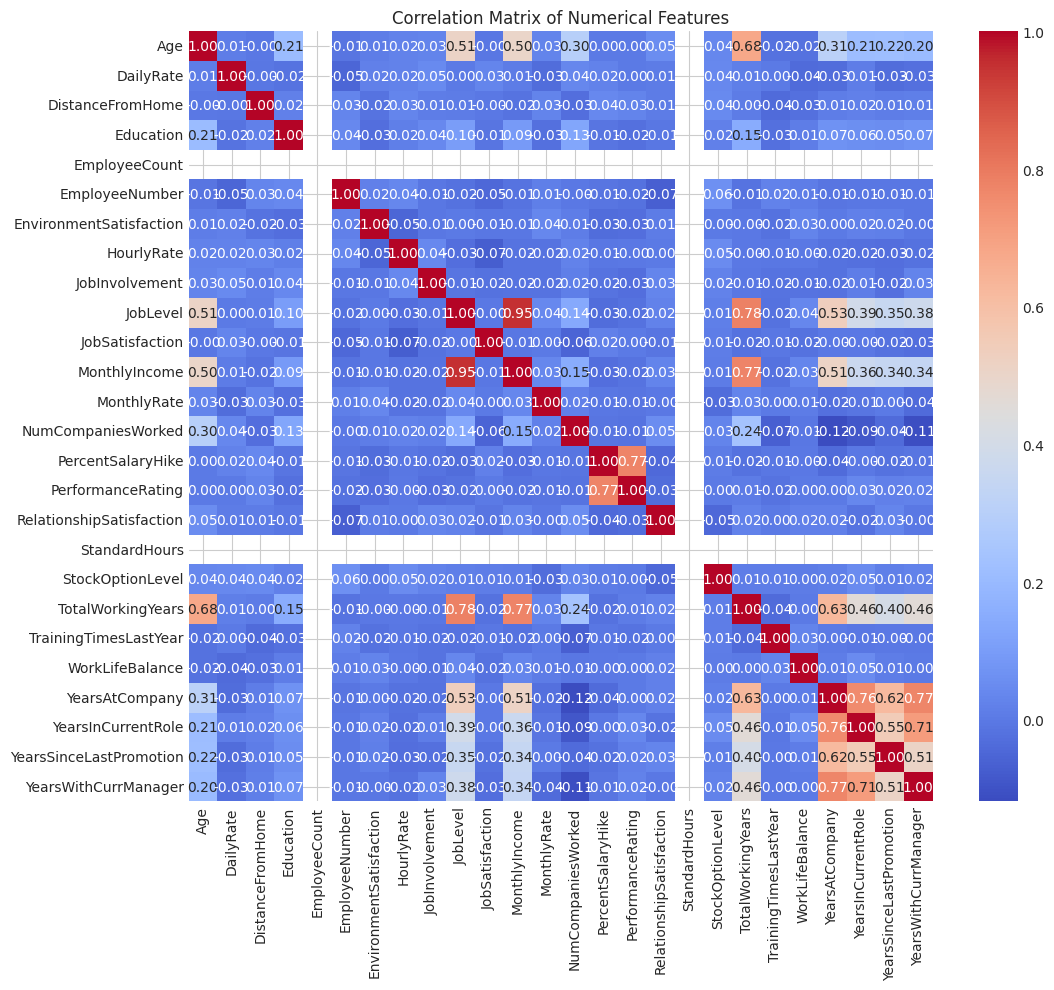

In [15]:
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

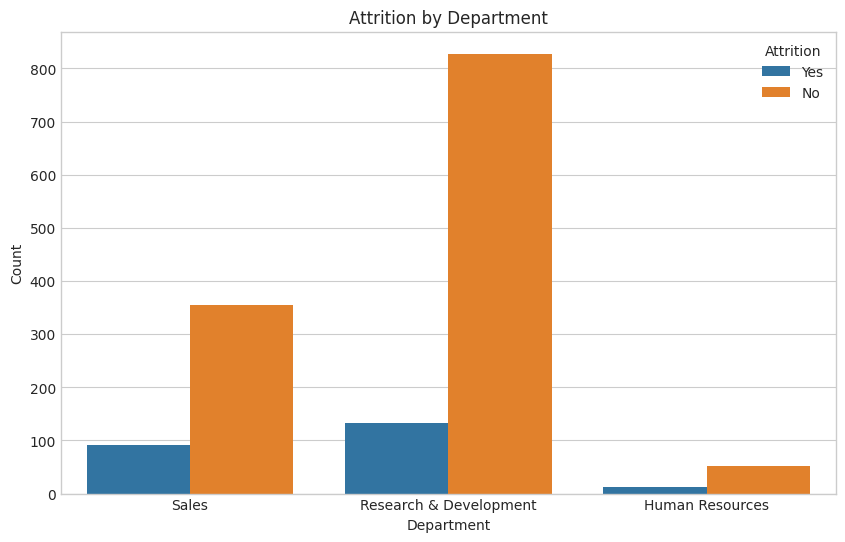

In [16]:
# Visualize Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

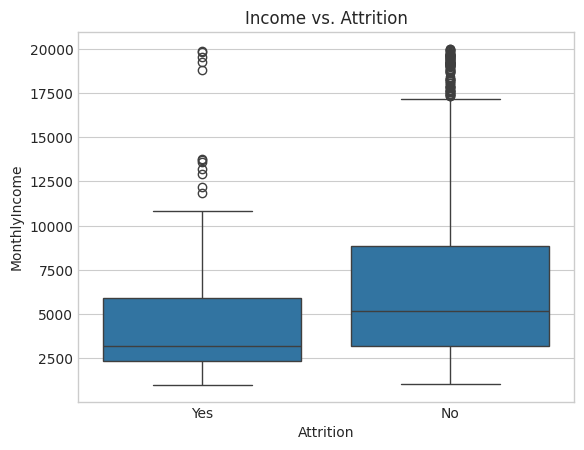

In [17]:
#Attrition by monthly income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Income vs. Attrition')
plt.show()

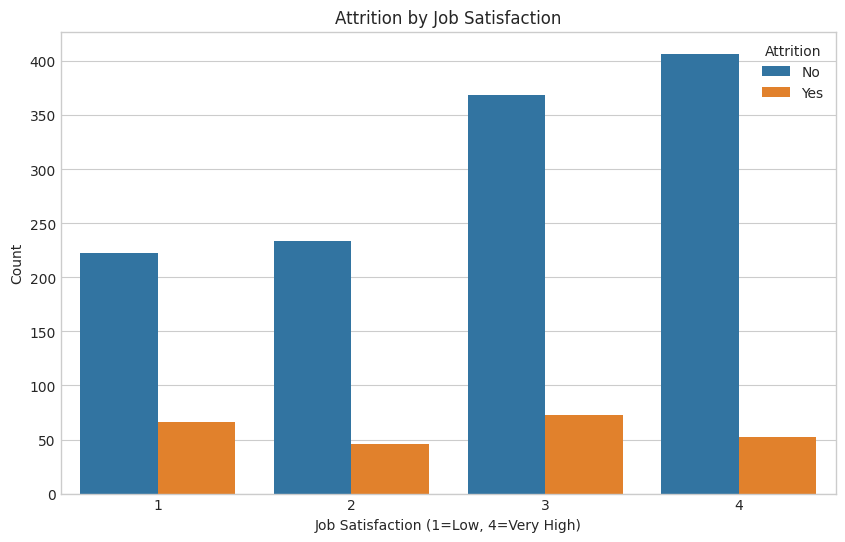

In [18]:
# Visualize Attrition by Job Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction (1=Low, 4=Very High)')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

In [19]:
# Drop irrelevant columns that don't contribute to prediction
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [20]:
# Encode the target variable (Attrition: Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [21]:
# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [22]:
# Define categorical and numerical columns for preprocessing
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [23]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Define preprocessing steps
# Scale numerical features and one-hot encode categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [25]:
# Linear Regression Model (not ideal for classification, included to invalidate)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [26]:
# Train Linear Regression
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('model', LinearRegression())])

In [27]:
# Predict and convert to binary classes using 0.5 threshold
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_lr_class = (y_pred_lr > 0.5).astype(int)

In [28]:
# Evaluate Linear Regression
print("\nLinear Regression Performance:")
print(classification_report(y_test, y_pred_lr_class))
print("Accuracy:", accuracy_score(y_test, y_pred_lr_class))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))



Linear Regression Performance:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294

Accuracy: 0.8741496598639455
ROC-AUC: 0.7825037707390649


In [29]:
# Logistic Regression Model (better suited for classification)
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [30]:
# Train Logistic Regression
logreg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('model', LogisticRegression())])

In [31]:
# Predict
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_logreg_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

In [32]:
# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_logreg_proba))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.64      0.46      0.54        39

    accuracy                           0.89       294
   macro avg       0.78      0.71      0.74       294
weighted avg       0.88      0.89      0.89       294

Accuracy: 0.8945578231292517
ROC-AUC: 0.7945701357466064


In [33]:
# K-Nearest Neighbors (KNN) Model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])

In [34]:
# Train KNN
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('model', KNeighborsClassifier())])

In [35]:
# Predict
y_pred_knn = knn_pipeline.predict(X_test)
y_pred_knn_proba = knn_pipeline.predict_proba(X_test)[:, 1]

In [36]:
# Evaluate KNN
print("\nKNN Performance:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_knn_proba))


KNN Performance:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294

Accuracy: 0.8775510204081632
ROC-AUC: 0.6882352941176471


In [37]:
# Random Forest Classifier Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Train Random Forest
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOpt...l',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [38]:
# Predict
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_proba))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294

Accuracy: 0.8775510204081632
ROC-AUC: 0.7415786827551533


In [39]:
# Compare model performance
model_performance = {
    'Model': ['Linear Regression', 'Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_class),
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr_class),
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_rf)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_logreg_proba),
        roc_auc_score(y_test, y_pred_knn_proba),
        roc_auc_score(y_test, y_pred_rf_proba)
    ]
}

In [40]:
# Display performance comparison
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                 Model  Accuracy  F1-Score   ROC-AUC
0    Linear Regression  0.874150  0.274510  0.782504
1  Logistic Regression  0.894558  0.537313  0.794570
2                  KNN  0.877551  0.217391  0.688235
3        Random Forest  0.877551  0.217391  0.741579


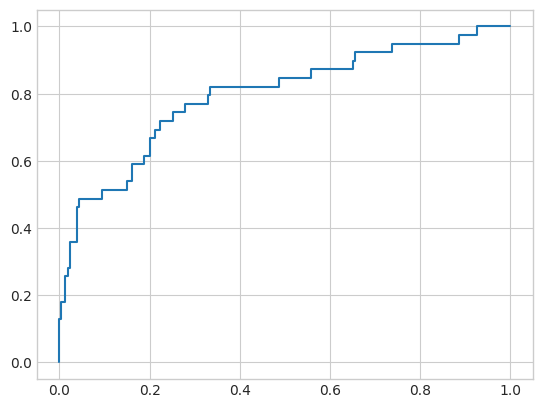

In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, logreg_pipeline.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.show()

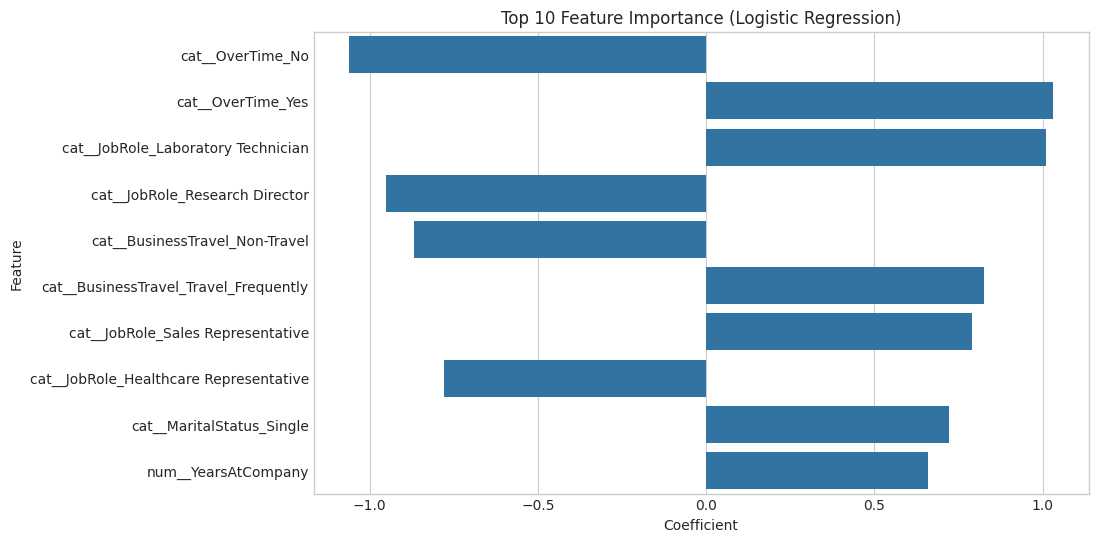


Business Insights:
1. **Key Drivers of Attrition**: Features with large positive coefficients (e.g., overtime, low job satisfaction) increase attrition risk.
2. **Retention Strategies**: Enhance factors with large negative coefficients (e.g., income, tenure) to improve retention.
3. **Targeted Interventions**: Use model insights to focus on high-risk groups (e.g., specific departments or roles).
4. **Model Selection**: Logistic Regression is preferred for its superior performance (Accuracy: 0.895, F1-Score: 0.537) and interpretability.


In [41]:
# Extract feature names and coefficients (using existing lr_pipeline)
feature_names = logreg_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = logreg_pipeline.named_steps['model'].coef_[0]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Business Insights
print("\nBusiness Insights:")
print("1. **Key Drivers of Attrition**: Features with large positive coefficients (e.g., overtime, low job satisfaction) increase attrition risk.")
print("2. **Retention Strategies**: Enhance factors with large negative coefficients (e.g., income, tenure) to improve retention.")
print("3. **Targeted Interventions**: Use model insights to focus on high-risk groups (e.g., specific departments or roles).")
print("4. **Model Selection**: Logistic Regression is preferred for its superior performance (Accuracy: 0.895, F1-Score: 0.537) and interpretability.")